# Launch object detection *training*

## Installation

You should select a runtime with GPU first: (Runtime -> Change Runtime Type = GPU)

In [1]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [2]:
!apt-get update 
!apt-get -y install libsm6 libxext6 libxrender-dev libcap-dev ffmpeg

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:3 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ Packages [88.1 kB]
Get:4 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:8 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease [21.3 kB]
Hit:11 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:12 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:13 http://ppa.launchpad.net/marutter/c2d4u3.5/ubuntu bionic InRelease [15.4 kB]
Get:14 http://security.ubuntu.com/ubuntu bionic-security/main a

In [3]:
!apt-get -y install git

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Suggested packages:
  gettext-base git-daemon-run | git-daemon-sysvinit git-doc git-el git-email
  git-gui gitk gitweb git-cvs git-mediawiki git-svn
The following packages will be upgraded:
  git
1 upgraded, 0 newly installed, 0 to remove and 60 not upgraded.
Need to get 3,912 kB of archives.
After this operation, 12.3 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 git amd64 1:2.17.1-1ubuntu0.6 [3,912 kB]
Fetched 3,912 kB in 3s (1,357 kB/s)
(Reading database ... 144602 files and directories currently installed.)
Preparing to unpack .../git_1%3a2.17.1-1ubuntu0.6_amd64.deb ...
Unpacking git (1:2.17.1-1ubuntu0.6) over (1:2.17.1-1ubuntu0.5) ...
Setting up git (1:2.17.1-1ubuntu0.6) ...


In [4]:
!pip install --upgrade git+https://github.com/surfriderfoundationeurope/mot.git

  Cloning https://github.com/surfriderfoundationeurope/mot.git to /tmp/pip-req-build-rbn3722g
  Running command git clone -q https://github.com/surfriderfoundationeurope/mot.git /tmp/pip-req-build-rbn3722g
     |████████████████████████████████| 296kB 2.6MB/s 
     |████████████████████████████████| 411.0MB 40kB/s 
     |████████████████████████████████| 327kB 41.5MB/s 
  Created wheel for mot: filename=mot-0.1-cp36-none-any.whl size=67375 sha256=517de08e08ac0c7e86b7c4113dc16bda527581672be8647f167278c826251127
  Stored in directory: /tmp/pip-ephem-wheel-cache-rtlhbjjp/wheels/76/5e/c9/557796bac605b218595cec16a4ba5d8fb5117e77227beecf78
  Created wheel for python-prctl: filename=python_prctl-1.7-cp36-cp36m-linux_x86_64.whl size=28040 sha256=dd08ca30435844aa869b2ad54ba3493ad9da972b83c71ba9169ecca98b319ad9
  Stored in directory: /root/.cache/pip/wheels/a8/f9/d3/c6677ca8ef4697229e92461dc112079c256102e34dc37b4648
  Created wheel for wget: filename=wget-3.2-cp36-none-any.whl size=9682 sha256=8

In [5]:
!git clone https://github.com/rafaelpadilla/Object-Detection-Metrics.git

Cloning into 'Object-Detection-Metrics'...
remote: Enumerating objects: 36, done.
remote: Counting objects: 100% (36/36), done.
remote: Compressing objects: 100% (29/29), done.
remote: Total 473 (delta 10), reused 26 (delta 7), pack-reused 437
Receiving objects: 100% (473/473), 2.70 MiB | 2.44 MiB/s, done.
Resolving deltas: 100% (198/198), done.


In [29]:
!git clone https://github.com/eljeilany/mot_objectdetection_val .

Cloning into 'mot_objectdetection_val'...
remote: Enumerating objects: 14, done.
remote: Counting objects: 100% (14/14), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 14 (delta 4), reused 13 (delta 3), pack-reused 0
Unpacking objects: 100% (14/14), done.


## Training

### Downloading dataset

In [0]:
import wget
from zipfile import ZipFile

wget.download("http://files.heuritech.com/raw_files/dataset_surfrider_cleaned.zip", ".")

with ZipFile('dataset_surfrider_cleaned.zip', 'r') as zipObj:
     zipObj.extractall()

### Download pretrained weights on COCO

In [7]:
wget.download("http://models.tensorpack.com/FasterRCNN/COCO-MaskRCNN-R50FPN2x.npz", ".")

'./COCO-MaskRCNN-R50FPN2x.npz'

### Launch the training

See this [file](https://github.com/surfriderfoundationeurope/mot/blob/master/src/mot/object_detection/README.md) to choose the architecture you want and the according pre trained weights. The weights downloaded above correspond to ResNet50-FPN with 2X scheduling.  
Since we are not interested in segmentation, we set MODE_MASK=False. Also, because the dataset is pretty small, we don't need to train the network for a lot of steps. We decrease the learning rate at steps (250,500,750) * 8 GPUs, correspoding to the steps (2000, 4000, 6000).

In [8]:
!python3 train.py --load COCO-MaskRCNN-R50FPN2x.npz --logdir resnet50_fpn --config DATA.BASEDIR=dataset_surfrider_cleaned MODE_MASK=False TRAIN.LR_SCHEDULE=250,500,750

[0416 20:46:28 @logger.py:90] Argv: train.py --load COCO-MaskRCNN-R50FPN2x.npz --logdir resnet50_fpn --config DATA.BASEDIR=dataset_surfrider_cleaned MODE_MASK=False TRAIN.LR_SCHEDULE=250,500,750
[0416 20:46:28 @train.py:73] Environment Information:
--------------------  -------------------------------------------------------------------
sys.platform          linux
Python                3.6.9 (default, Nov  7 2019, 10:44:02) [GCC 8.3.0]
Tensorpack            v0.9.8-0-gb6318616
Numpy                 1.18.2
TensorFlow            1.15.2/v1.15.2-0-g5d80e1e8e6
TF Compiler Version   7.4.0
TF CUDA support       True
TF MKL support        False
TF XLA support        False
Nvidia Driver         /usr/lib64-nvidia/libnvidia-ml.so.418.67
CUDA                  /usr/local/cuda-10.1/targets/x86_64-linux/lib/libcudart.so.10.1.243
CUDNN                 /usr/lib/x86_64-linux-gnu/libcudnn.so.7.6.5
NCCL                  /usr/lib/x86_64-linux-gnu/libnccl.so.2.4.8
CUDA_VISIBLE_DEVICES  None
GPU 0            

### Visualize predictions

In [9]:
!python3 -m predict --load resnet50_fpn/model-6000 --predict dataset_surfrider_cleaned/Images_md5/9ddc58812851ad643114930524601f10 --config DATA.BASEDIR=dataset_surfrider_cleaned MODE_MASK=False


{'BACKBONE': {'FREEZE_AFFINE': False,
              'FREEZE_AT': 2,
              'NORM': 'FreezeBN',
              'RESNET_NUM_BLOCKS': [3, 4, 6, 3],
              'STRIDE_1X1': False,
              'TF_PAD_MODE': False,
              'WEIGHTS': ''},
 'CASCADE': {'BBOX_REG_WEIGHTS': [[10.0, 10.0, 5.0, 5.0], [20.0, 20.0, 10.0, 10.0],
                                  [30.0, 30.0, 15.0, 15.0]],
             'IOUS': [0.5, 0.6, 0.7]},
 'DATA': {'ABSOLUTE_COORD': True,
          'BASEDIR': '/workspace/mot/dataset_surfrider_cleaned',
          'CLASS_NAMES': [],
          'NUM_CATEGORY': -1,
          'NUM_WORKERS': 10,
          'TRAIN': ('mot_train',),
          'VAL': ('mot_val',)},
 'FPN': {'ANCHOR_STRIDES': (4, 8, 16, 32, 64),
         'CASCADE': False,
         'FRCNN_CONV_HEAD_DIM': 256,
         'FRCNN_FC_HEAD_DIM': 1024,
         'FRCNN_HEAD_FUNC': 'fastrcnn_2fc_head',
         'MRCNN_HEAD_FUNC': 'maskrcnn_up4conv_head',
         'NORM': 'None',
         'NUM_CHANNEL': 256,
      

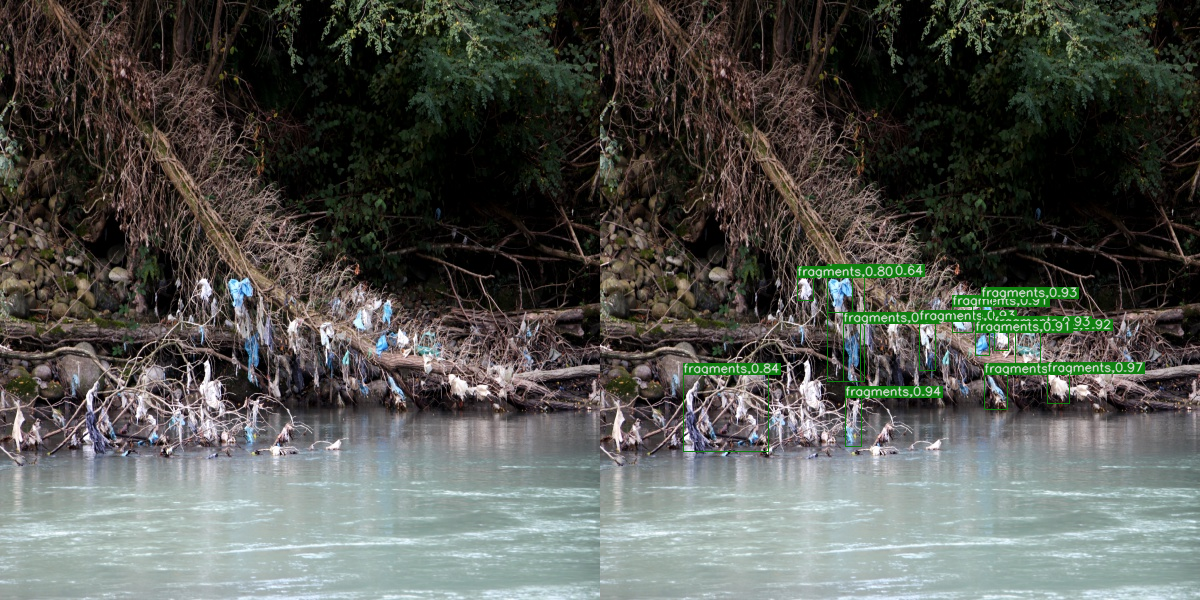

In [10]:
from IPython.display import Image
Image('output.png')

### Validation

In [12]:
!python3 predict.py --load resnet50_fpn/model-6000 --evaluate=eval_out.json --config DATA.BASEDIR=dataset_surfrider_cleaned MODE_MASK=False


{'BACKBONE': {'FREEZE_AFFINE': False,
              'FREEZE_AT': 2,
              'NORM': 'FreezeBN',
              'RESNET_NUM_BLOCKS': [3, 4, 6, 3],
              'STRIDE_1X1': False,
              'TF_PAD_MODE': False,
              'WEIGHTS': ''},
 'CASCADE': {'BBOX_REG_WEIGHTS': [[10.0, 10.0, 5.0, 5.0], [20.0, 20.0, 10.0, 10.0],
                                  [30.0, 30.0, 15.0, 15.0]],
             'IOUS': [0.5, 0.6, 0.7]},
 'DATA': {'ABSOLUTE_COORD': True,
          'BASEDIR': '/workspace/mot/dataset_surfrider_cleaned',
          'CLASS_NAMES': [],
          'NUM_CATEGORY': -1,
          'NUM_WORKERS': 10,
          'TRAIN': ('mot_train',),
          'VAL': ('mot_val',)},
 'FPN': {'ANCHOR_STRIDES': (4, 8, 16, 32, 64),
         'CASCADE': False,
         'FRCNN_CONV_HEAD_DIM': 256,
         'FRCNN_FC_HEAD_DIM': 1024,
         'FRCNN_HEAD_FUNC': 'fastrcnn_2fc_head',
         'MRCNN_HEAD_FUNC': 'maskrcnn_up4conv_head',
         'NORM': 'None',
         'NUM_CHANNEL': 256,
      

In [0]:
import json
import os

In [0]:
results = json.load(open("./eval_out.json-mot_val"))

In [0]:
images = set()
for i in results:
    images.add(i['image_id'])

In [0]:
opened = {}
os.mkdir("./predictions")
for item in results:
    op = 'a'
    if item['image_id'] not in opened:
        opened[item['image_id']] = 1
        op='w'
    with open("./predictions/{}.txt".format(item['image_id']),op) as out_file:
        bb = [ int(i) for i in item['bbox']]
        out_file.write(item['category_id'] + " {:.3f} ".format(item['score']) + " ".join([str(a) for a in bb]) + '\n')

In [0]:
PATH = './dataset_surfrider_cleaned'
dataset = []
with open(PATH+"/dataset.json") as f:
    for line in f:
        dataset.append(json.loads(line))
valid = dataset[-70:]

In [0]:
os.mkdir(PATH+"/valid_annot/")
os.mkdir(PATH+"/valid_annot/groundtruths/")
for item in valid:
    with open(PATH+"/valid_annot/groundtruths/{}.txt".format(item['md5']),'w') as out_file:
        for box in item['labels']:
            bb = [ int(i) for i in box['bbox']]
            out_file.write(box['label'] + " " + " ".join([str(a) for a in bb]) + '\n')

In [0]:
os.mkdir("./plots/")

In [21]:
%pwd

'/content'

In [25]:
METRIC_PATH = '/content/dataset_surfrider_cleaned'
METRIC_PATH

'/content/dataset_surfrider_cleaned'

In [26]:
!python3 Object-Detection-Metrics/pascalvoc.py -gt /content/dataset_surfrider_cleaned/valid_annot/groundtruths/ -det /content/predictions/ -sp /content/plots/

<Figure size 640x480 with 1 Axes>
<Figure size 640x480 with 1 Axes>
<Figure size 640x480 with 1 Axes>
AP: 76.54% (bottles)
AP: 76.19% (fragments)
AP: 47.00% (others)
mAP: 66.58%


In [27]:
%ls ./plots/

bottles.png  fragments.png  others.png  results.txt


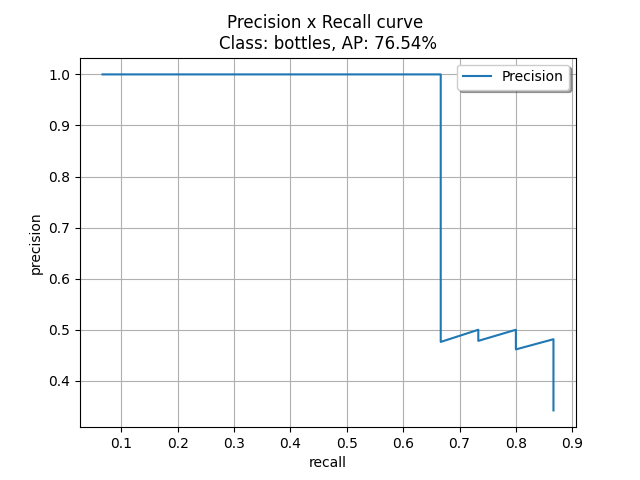

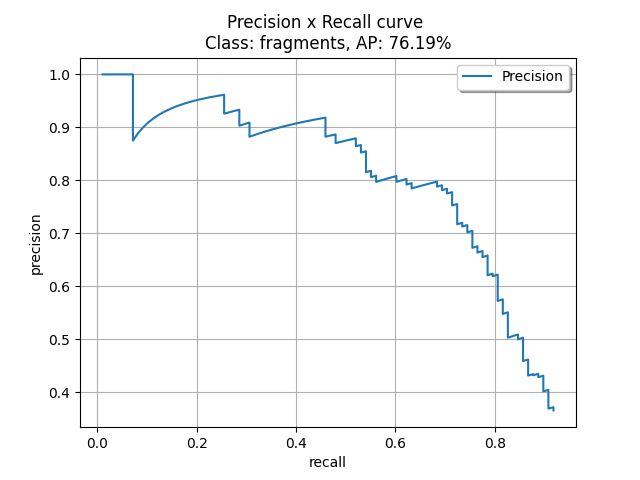

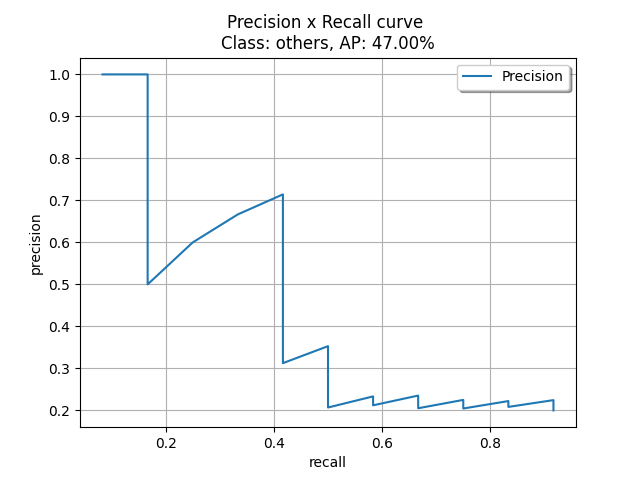

In [28]:
from IPython.display import Image
from IPython.display import display
bottles = Image('./plots/bottles.png') 
fragments = Image('./plots/fragments.png')
others = Image('./plots/others.png')
display(bottles, fragments, others)